In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Implementing colorblind module in Python

## Overview

In this tutorial, I will demonstrate how to implement the Python module `colorblind` to check your figures for color blindness/ deficiency.

### Background

According to the [NIH's National Eye Institute](https://www.nei.nih.gov/learn-about-eye-health/eye-conditions-and-diseases/color-blindness), about one out of 12 men are color blind. Although less at risk, about 1 of every 200 women expenrience color blindness. Although everyone sees colors differently, color blind individuals have a much harder time differentiating between colors. Research shows that there are different types of color blindness, but the 2 most common are red-green weakness/ blindness and blue-yellow weakness, which will be demonstrated later in the tutorial.

It is important for data scientists and analysts to do a spotcheck of their data visualizations every now and then - our figures are only useful when people can interpret them, and someone who can't tell a red dot apart from a green dot would not find any use for a scatterplot with only red and green dots.

### Motivations

Colblindor (https://www.color-blindness.com/coblis-color-blindness-simulator/) is a website where users can upload their own images and apply color filters to see how a colorblind person would see colors in a picture. The website is great for those who are curious about how the world looks like for a colorblind person. Although it is a very useful tool, as an aspiring data scientist, I have used it fewer times than I would have liked, for several reasons:

1) I find it cumbersome having to save a draft of a plot, go to the website, check the filters, and then go back to my Notebook/ script to make changes.

2) If I'm working on internal/ confidential data, I don't want to first upload it to an external website.

Thus, I wanted to find if there exists a module that allows Python users to apply colorblind filters to figures on-the-go, without breaking their workflow, and hallelujah, it exists!

### Introducing `colorblind`


The [`colorblind` package](https://pypi.org/project/colorblind/) was released on January 11, 2021, so it is relatively new. Aside from the user guide included in the above link, I have not found another blog post or tutorial demonstrating how to use it and what it does in practice. The link to the package is the top result for "python colorblind" in Google, however, subsequent links are about Python colorblind palletes and not how to use `colorblind` in data visualization with Python.

I am writing this tutorial to demonstrate how to use the module to spot check your data visualizations and what you need to run it in a Jupyter Notebook.

## Installation

The module can be installed with `pip install colorblind`
You will also need `OpenCV`, `matplotlib` and `numpy`, so make sure to have the modules installed on your system/ virtual environment. Side note: I have been using a 2021 Macbook Pro with the brand new M1 Max chip, so I've been extra skittish about using virtual environments since some modules haven't offered native support for Apple Silicon chips - luckily this isn't the case with `colorblind`.




## Types of colorblindness

As a quick example, I will first use the module to apply color blindness filters on a normal photo to demonstrate the different kinds of color blindness before exploring how data scientists can benefit from using this package in their data science workflow.

This is a screenshot of the 2018 World Cup match between Russia (red) and Saudi Arabia (green). If you can immediately tell the difference between the 2 teams, congratulations, you do not have red-green color blindness. If you have difficulty differentiating them, Russia is the team with white pants, and I hope this tutorial isn't where you learned that you are red-green color blind.


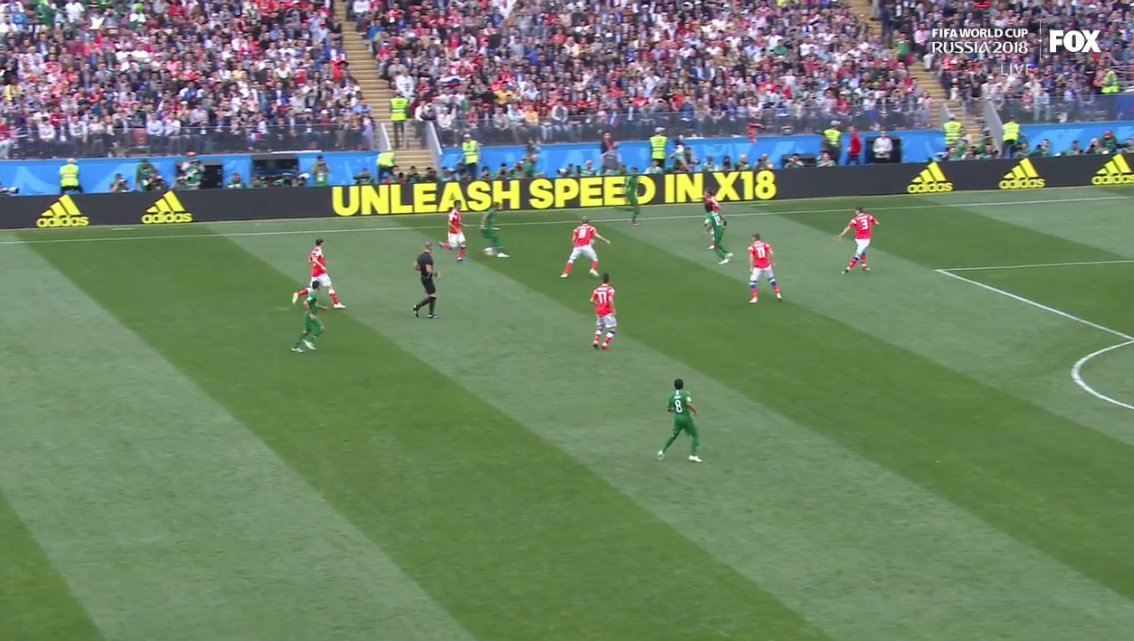


Using this photo and `colorblind`, I can demonstrate what red-green color blind people see when they look at the picture. First, let's import our modules.

In [2]:
from colorblind import colorblind

We want to load the photo into our Jupyter Notebook, but in a way that our computers can also "see" it. This is where `OpenCV` and `numpy` comes in.

In [3]:
import numpy as np
import cv2

# Load the photo
img = cv2.imread('./world_cup.jpg')


In [4]:
# Check type
type(img)

numpy.ndarray

In [5]:
# Check shape
img.shape

(641, 1134, 3)

Our World Cup image is a numpy array with height 641, width 1134, and 3 color channels. Every colored image has 3 color channels: Red, Green, Blue - RGB. [OpenCV, for legacy reasons, uses BGR](https://learnopencv.com/why-does-opencv-use-bgr-color-format/) when it reads images, so the first step is to reverse this order. Luckily, the image is a numpy aray, so we can interact with it like we would with any numpy vector.

In [6]:
# Reverse the color channels
img = img[...,::-1]

Now that the image is loaded and processed, let's use `colorblind` to see what the World Cup match looked like for viewers who are red-green color blind. Scientifically, red color blindess is called "protanopia" which is what we'll indicate for the package

In [7]:
# simulate protanopia
red_sim = colorblind.simulate_colorblindness(img, colorblind_type='protanopia')

type(red_sim)

numpy.ndarray

`red_sim` is a numpy array just like `img`. This means we will need to be convert it into a picture for human vision. The `matplotlib` function `imshow()` will help us do that inside a Jupyter Notebook.

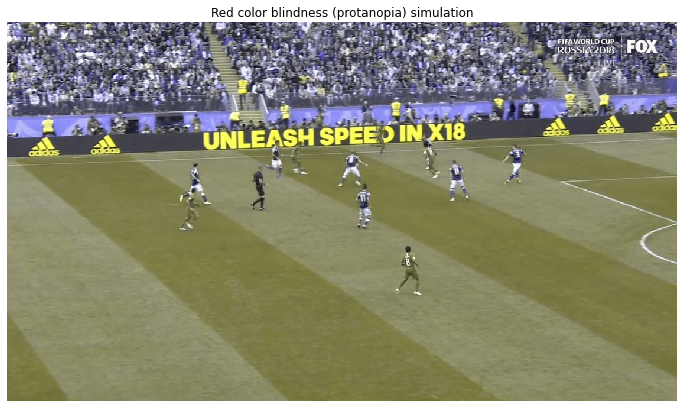

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot()
ax.imshow(red_sim, interpolation='none')
ax.set_title("Red color blindness (protanopia) simulation")
plt.axis("off") # Remove axes & tick marks

plt.show()

Yikes! This is how the match looked like for those with red color blindness. Now let's simulate green color blindness (deuteranopia).

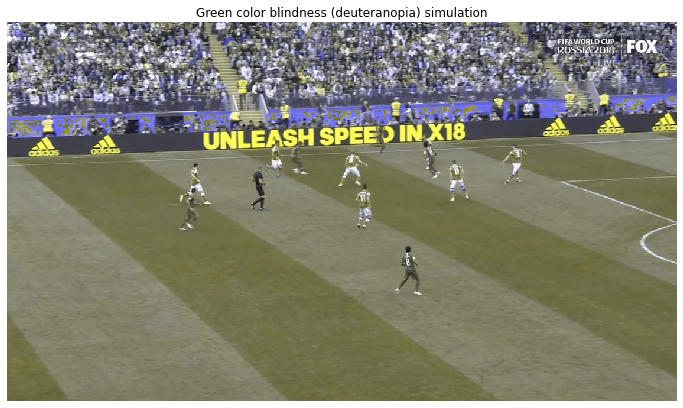

In [9]:
green_sim = colorblind.simulate_colorblindness(img, colorblind_type='deuteranopia')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot()
ax.imshow(green_sim, interpolation='none')
ax.set_title("Green color blindness (deuteranopia) simulation")
plt.axis("off") # Remove axes & tick marks
plt.show()

The picture looks more or less the same with for people with green color blindness. 

Another type of color blindness is blue-yellow color blindness, or tritanopia. Since there are some yellow texts on a blue banner in this World Cup picture, let's use it to create our third simulation.



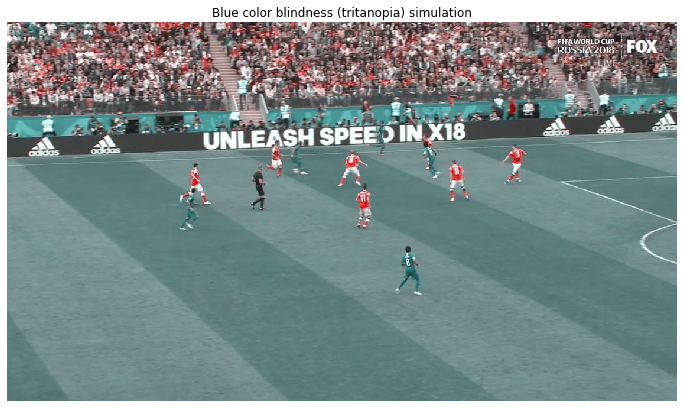

In [10]:
blue_sim = colorblind.simulate_colorblindness(img, colorblind_type='tritanopia')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot()
ax.imshow(blue_sim, interpolation='none')
ax.set_title("Blue color blindness (tritanopia) simulation")
plt.axis("off") # Remove axes & tick marks
plt.show()

# What does this have to do with Data Visualization/ Data Science?

Now that we've established what color blindness is and how to use the `colorblind` package to simulate colorblindness in photos, let's discuss how this simple package can help data scientists create color blind-friendly figures.

Suppose you want to demonstrate a classification technique. Let's generate a toy plot with 2 classes and color them red and green. 

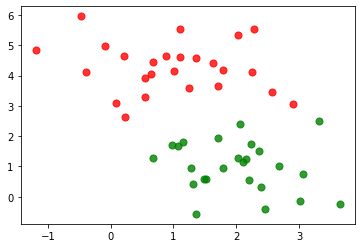

In [11]:
# Note: Code adapted from https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
from sklearn.datasets import make_blobs
import matplotlib

my_colors = ['red','green']
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.85)

plt.scatter(X[y == 0, 0], X[y == 0, 1],alpha=0.80, s=50, marker='o', color = 'red')
plt.scatter(X[y == 1, 0], X[y == 1, 1],alpha=0.80, s=50, marker='o', color = 'green')

plt.savefig('./blobs.png', dpi=300)



We want to demonstrate how Support Vector Machines would split these 2 clusters in 2 separate classes by drawing a line between 2 clusters. A person without red-green color blindness can probably tell where the SVM split should be. 

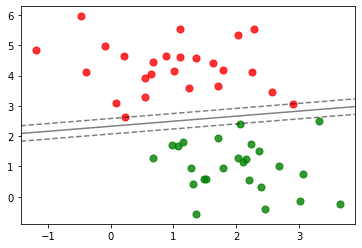

In [12]:
# Note: Code adapted from https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha =0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X[y == 0, 0], X[y == 0, 1],alpha=0.80, s=50, marker='o', color = 'red')
ax.scatter(X[y == 1, 0], X[y == 1, 1],alpha=0.80, s=50, marker='o', color = 'green')
plot_svc_decision_function(model)
plt.savefig('./SVM.png', dpi=300)
plt.show()



Now, let's simulate what the above figure appears like for someone with deuteranopia. Because `colorblind` is built on top of `OpenCV`, we still need to save the figure locally as a photo, then read it back into our notebook before we can use `colorblind`. Thankfully, all of this can be done within 1 code block in Jupyter Notebook.


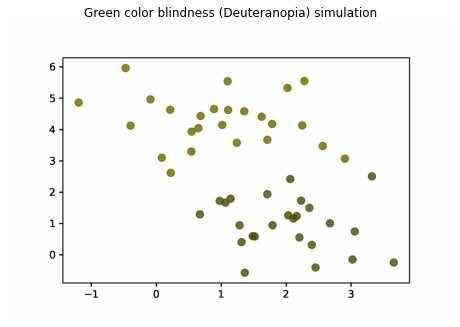

In [13]:
# Read in the toy scatter
img = cv2.imread('./blobs.png')
img = img[...,::-1]

# Simulate pro
sim = colorblind.simulate_colorblindness(img, colorblind_type='deut')


plt.figure(figsize=(8,6))
plt.title("Green color blindness (Deuteranopia) simulation")

plt.imshow(sim)
plt.axis("off")
plt.show()

Thanks to the deuteranopia filter, we can see that it is nearly impossible to distinguish between the red and green  markers in our figure. When someone with red-green colorblindness looks at these 2 clusters, they would not be able to tell why SVM splits the dataset where it does. 

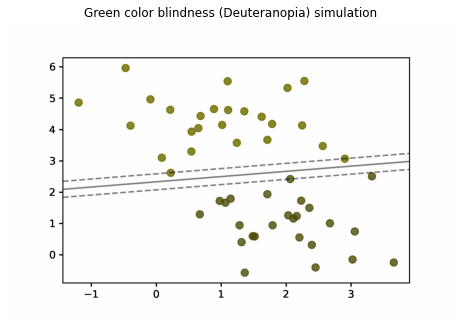

In [14]:
# Read in the toy scatter
img = cv2.imread('./SVM.png')
img = img[...,::-1]

# Simulate pro
sim = colorblind.simulate_colorblindness(img, colorblind_type='deut')



plt.figure(figsize=(8,6))
plt.title("Green color blindness (Deuteranopia) simulation")

plt.imshow(sim)
plt.axis("off")
plt.show()

## Conclusion 

The `colorblind` module allows us to do ad-hoc visual checks without having to disrupt our workflow or upload internal/ confidential/ work-in-progress data visualizations externally. 

Aside from this pacakage, there are troves of resources to help practitioners create color blind-friendly data visualizations, such as [color blind palletes](https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40) and redundant encoding as shown below.


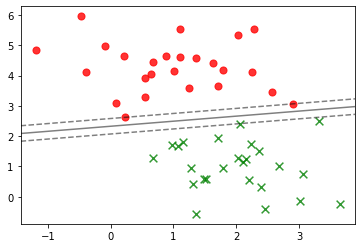

In [15]:
plt.scatter(X[y == 0, 0], X[y == 0, 1],alpha=0.80, s=50, marker='o', color = 'red')
plt.scatter(X[y == 1, 0], X[y == 1, 1],alpha=0.80, s=60, marker='x', color = 'green')
plot_svc_decision_function(model)
plt.savefig('./SVM_redundant.png', dpi=300)
plt.show()

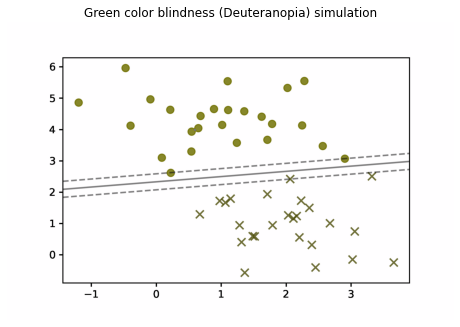

In [16]:
img = cv2.imread('./SVM_redundant.png')
img = img[...,::-1]

# Simulate pro
sim = colorblind.simulate_colorblindness(img, colorblind_type='deut')


plt.figure(figsize=(8,6))
plt.title("Green color blindness (Deuteranopia) simulation")

plt.imshow(sim)
plt.axis("off")
plt.show()